# Data import
import labeled dataset and cleans all rows that do not posses a label to this point

In [1]:
import pandas as pd


# Load your data
data = pd.read_excel('../../data/080524subset_studium_german.xlsx')

data.head()
# Get all rows that are non empty
cleanedData = data[data['Studium_Label'].notnull()]
cleanedData.head()

,Unnamed: 0,Studium,Studium_Label,Studium_Comment
0,0,Die Vorlesungszeit war von Anfang September bi...,neutral,"pos:\nVielzahl an Kursen, praxisnäher, Sprachn..."
1,1,Die Pazmany Universität ist sehr klein im Verg...,positive,pos:\nsehr klein was ich schön und angenehm fa...
2,2,Mit der Universität selbst hatten wir wenig zu...,neutral,neg:\nkaum Zeit zu arbeiten\n\npos: alles ist ...
3,3,Da die Vorlesungen wegen der Pandemie online s...,positive,"pos:\nnette Mensa, großes Kursangebot, leichte..."
4,4,Die City University of Hong Kong hat eine groß...,negative,"neg: \nhoher Workload, Bewertung intransparent..."


# Model application

imports the BERT based germantsentiment model created by oliver guhr (https://huggingface.co/oliverguhr/german-sentiment-bert). The model is then applied to only the text of an column. The for loop can be expanded to accomodatae for multiple columns.

In [2]:
from germansentiment import SentimentModel

model = SentimentModel()

columns = ['Studium']
for x in columns:
    cleanedData[x] = cleanedData[x].astype(str)
    results = model.predict_sentiment(cleanedData[x])
    print("------------------------------")
    print("Results of: " + x)
    print("negative entries: " + str(results.count('negative')))
    print("positive entries: " + str(results.count('positive')))
    print("neutral entries: " + str(results.count('neutral')))
    print("------------------------------")

/Users/fabianstreitleisure/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/Users/fabianstreitleisure/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/var/folders/vr/hb099htx7sbglwdnz8y2_ykh0000gp/T/ipykernel_98573/3330814730.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedData[x] = cleanedData[x].astype(str)


------------------------------
Results of: Studium
negative entries: 83
positive entries: 248
neutral entries: 586
------------------------------


In [3]:
#append prediction to dataframe
cleanedData['SentimentPrediction'] = results
cleanedData.head()

/var/folders/vr/hb099htx7sbglwdnz8y2_ykh0000gp/T/ipykernel_98573/1581827758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedData['SentimentPrediction'] = results


,Unnamed: 0,Studium,Studium_Label,Studium_Comment,SentimentPrediction
0,0,Die Vorlesungszeit war von Anfang September bi...,neutral,"pos:\nVielzahl an Kursen, praxisnäher, Sprachn...",neutral
1,1,Die Pazmany Universität ist sehr klein im Verg...,positive,pos:\nsehr klein was ich schön und angenehm fa...,positive
2,2,Mit der Universität selbst hatten wir wenig zu...,neutral,neg:\nkaum Zeit zu arbeiten\n\npos: alles ist ...,negative
3,3,Da die Vorlesungen wegen der Pandemie online s...,positive,"pos:\nnette Mensa, großes Kursangebot, leichte...",neutral
4,4,Die City University of Hong Kong hat eine groß...,negative,"neg: \nhoher Workload, Bewertung intransparent...",positive


# Evaluation

In [4]:
def calculateMatch(df):
    match_count = (df['Studium_Label'] == df['SentimentPrediction']).sum()
    return match_count

In [5]:
print(calculateMatch(cleanedData))

426


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


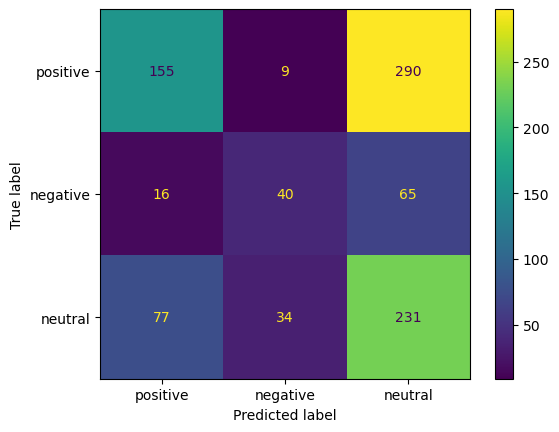

0.46455834242093785
              precision    recall  f1-score   support

    positive       0.48      0.33      0.39       121
    negative       0.39      0.68      0.50       342
     neutral       0.62      0.34      0.44       454

    accuracy                           0.46       917
   macro avg       0.50      0.45      0.44       917
weighted avg       0.52      0.46      0.46       917



In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
import matplotlib.pyplot as plt
confusion_mat = confusion_matrix(cleanedData['Studium_Label'], cleanedData['SentimentPrediction'], labels=['positive', 'negative', 'neutral'])

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['positive', 'negative', 'neutral'])
disp.plot()
plt.show()
print(f1_score(cleanedData['Studium_Label'], cleanedData['SentimentPrediction'], labels=['positive', 'negative', 'neutral'], average='micro'))
print(classification_report(
    cleanedData['Studium_Label'],
    cleanedData['SentimentPrediction'],
    output_dict=False,
    target_names=['positive', 'negative', 'neutral']
))